    Jacob Knopping
    4/15/2020

    37.7 Challenge

The dataset used for this challenge can be found here:
https://www.kaggle.com/slothkong/10-monkey-species.

In the dataset, there two files, one for training and one for validation. There are 10 folders of images corresponding to different monkey species. The goal of this challenge is to perform image classification using TensorFlow and Keras.

__Import Libraries__

In [2]:
import numpy as np
import pandas as pd 

In [3]:
import os

In [4]:
import cv2 

from keras.preprocessing.image import img_to_array, ImageDataGenerator
from keras import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout
from keras.optimizers import Adam, SGD, Adadelta

Using TensorFlow backend.


In [5]:
# Import various componenets for model building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop

# Import the backend
from keras import backend as K

In [6]:
train_dir = 'C:\\Users\\Jacob Knopping\\Desktop\\Python Files\\Thinkful\\Thinkful_Capstone_Projects\\10-monkey-species\\training\\training'
test_dir = 'C:\\Users\\Jacob Knopping\\Desktop\\Python Files\\Thinkful\\Thinkful_Capstone_Projects\\10-monkey-species\\validation\\validation'
labels_file_dir = 'C:\\Users\\Jacob Knopping\\Desktop\\Python Files\\Thinkful\\Thinkful_Capstone_Projects\\10-monkey-species\\monkey_labels.txt'

img_size = 224

In [7]:
from pathlib import Path
labels_path = Path(labels_file_dir)
labels = pd.read_csv(labels_path)
labels

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


__Generate Test and Validation Data__

In [7]:
train_datagen = ImageDataGenerator(
        brightness_range=[0.8,1.0],
        channel_shift_range=40,
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(img_size, img_size),
                                                    batch_size=20,
                                                    shuffle=True,
                                                    class_mode='categorical')

# Test generator
test_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(img_size, img_size), 
                                                  batch_size=5,
                                                  shuffle=False,
                                                  class_mode='categorical')

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


__CNN Model__

In [11]:
# CNN model
model  = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 774400)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               99123328  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [9]:
import tensorflow as tf
import keras

In [13]:
model.compile(loss=keras.losses.categorical_crossentropy,
              #optimizer=keras.optimizers.Adadelta(),
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

In [16]:
model.fit_generator(train_generator,
          #batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=validation_generator)

Epoch 1/10
55/55 [==============================] - 193s 4s/step - loss: 4.9487 - accuracy: 0.1293 - val_loss: 2.4770 - val_accuracy: 0.2132
Epoch 2/10
55/55 [==============================] - 163s 3s/step - loss: 2.2067 - accuracy: 0.1849 - val_loss: 2.1937 - val_accuracy: 0.2243
Epoch 3/10
55/55 [==============================] - 165s 3s/step - loss: 2.1817 - accuracy: 0.1985 - val_loss: 2.1669 - val_accuracy: 0.2096
Epoch 4/10
55/55 [==============================] - 165s 3s/step - loss: 2.1023 - accuracy: 0.2240 - val_loss: 1.7852 - val_accuracy: 0.2610
Epoch 5/10
55/55 [==============================] - 167s 3s/step - loss: 2.0695 - accuracy: 0.2541 - val_loss: 1.8949 - val_accuracy: 0.2721
Epoch 6/10
55/55 [==============================] - 171s 3s/step - loss: 1.9761 - accuracy: 0.2696 - val_loss: 1.4994 - val_accuracy: 0.3162
Epoch 7/10
55/55 [==============================] - 164s 3s/step - loss: 1.9604 - accuracy: 0.2842 - val_loss: 1.3379 - val_accuracy: 0.3676
Epoch 8/10
55

In [17]:
history = model.history

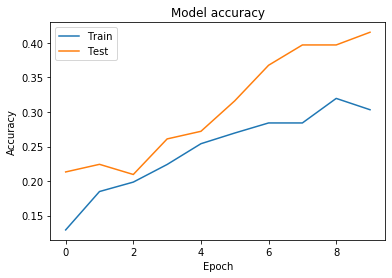

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

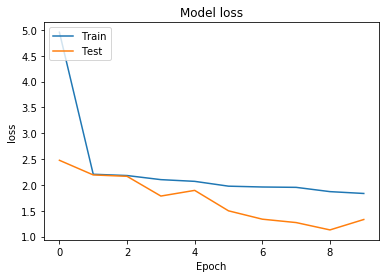

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
# Evaluation.
scores = model.evaluate(validation_generator, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 1.331683874130249
Test accuracy: 0.4154411852359772


After 10 epochs, accuracy for the CNN model is only about 41%. Let's see if adding more layers and adjusting some of the parameters for the model improves results.

In [12]:
#Try again, adding a few more layers
model  = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(img_size, img_size,3)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

#model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              #optimizer=keras.optimizers.Adadelta(),
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 220, 220, 128)     73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 110, 110, 128)     0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 108, 108, 64)      73792     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 106, 106, 128)     73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 53, 53, 128)      

In [14]:
model.fit_generator(train_generator,
          #batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=validation_generator)

Epoch 1/10
55/55 [==============================] - 393s 7s/step - loss: 2.4053 - accuracy: 0.1102 - val_loss: 2.2689 - val_accuracy: 0.1324
Epoch 2/10
55/55 [==============================] - 418s 8s/step - loss: 2.1744 - accuracy: 0.2104 - val_loss: 2.0863 - val_accuracy: 0.3162
Epoch 3/10
55/55 [==============================] - 407s 7s/step - loss: 2.0303 - accuracy: 0.2532 - val_loss: 1.8400 - val_accuracy: 0.3750
Epoch 4/10
55/55 [==============================] - 407s 7s/step - loss: 1.9150 - accuracy: 0.3142 - val_loss: 1.8355 - val_accuracy: 0.4154
Epoch 5/10
55/55 [==============================] - 404s 7s/step - loss: 1.9025 - accuracy: 0.3297 - val_loss: 1.7499 - val_accuracy: 0.4338
Epoch 6/10
55/55 [==============================] - 403s 7s/step - loss: 1.8407 - accuracy: 0.3497 - val_loss: 1.8859 - val_accuracy: 0.4301
Epoch 7/10
55/55 [==============================] - 393s 7s/step - loss: 1.8455 - accuracy: 0.3607 - val_loss: 1.6991 - val_accuracy: 0.4816
Epoch 8/10
55

In [15]:
history = model.history

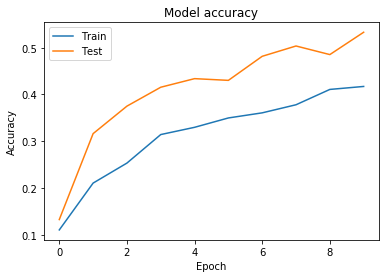

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

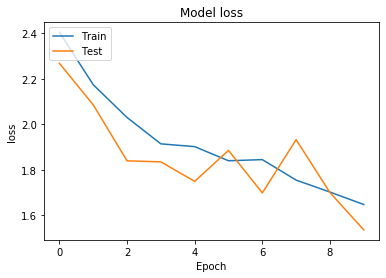

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Accuracy is relatively low at about 53%. Let's instead use a pre-trained CNN model, Xception. Xception is one of several base models than can be used to boost performance.

__Xception Model__

In [8]:
img_size = 224
batch_size = 4

train_datagen = ImageDataGenerator(
    rotation_range = 30,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [9]:
from keras import applications

# Xception CNN classifier
base_model_Xception = applications.Xception(weights='imagenet', # use pre-trained weights
                                           include_top=False # not including fully connected layers
                                           )
# Pooling layer
x = base_model_Xception.output
x = GlobalAveragePooling2D()(x)

# Dropout layer
x = Dropout(0.4)(x)

# Fully-connected layer
#x = layers.Dense(512, activation='relu')(x)

# Classification layer for output (fully-connected)
predictions = Dense(10, activation='softmax')(x)

# Create full network for training
Xception_model = Model(inputs=base_model_Xception.input,
                             outputs=predictions)

In [10]:
Xception_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [11]:
Xception_model.compile(loss='categorical_crossentropy',
                      optimizer=SGD(lr=.0001, momentum=0.9),
                       metrics=['accuracy'])

In [12]:
history = Xception_model.fit_generator(train_generator,
                                       epochs=10,
                                      verbose=1,
                                      validation_data=validation_generator)

Epoch 1/10
275/275 [==============================] - 623s 2s/step - loss: 2.2974 - accuracy: 0.1093 - val_loss: 2.1903 - val_accuracy: 0.3088
Epoch 2/10
275/275 [==============================] - 621s 2s/step - loss: 2.1778 - accuracy: 0.2386 - val_loss: 2.2106 - val_accuracy: 0.6066
Epoch 3/10
275/275 [==============================] - 619s 2s/step - loss: 1.9760 - accuracy: 0.4426 - val_loss: 1.4958 - val_accuracy: 0.7941
Epoch 4/10
275/275 [==============================] - 619s 2s/step - loss: 1.7662 - accuracy: 0.6093 - val_loss: 1.0795 - val_accuracy: 0.8897
Epoch 5/10
275/275 [==============================] - 1699s 6s/step - loss: 1.5120 - accuracy: 0.7049 - val_loss: 0.7639 - val_accuracy: 0.9338
Epoch 6/10
275/275 [==============================] - 619s 2s/step - loss: 1.2341 - accuracy: 0.7614 - val_loss: 0.6126 - val_accuracy: 0.9485
Epoch 7/10
275/275 [==============================] - 754s 3s/step - loss: 1.0482 - accuracy: 0.8115 - val_loss: 0.3193 - val_accuracy: 0.955

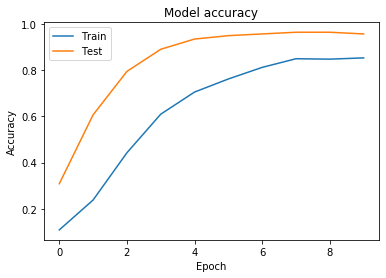

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

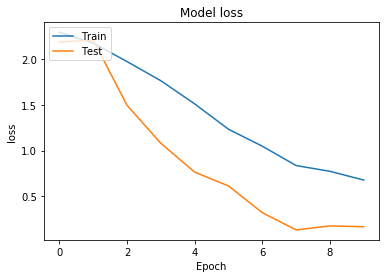

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
# Evaluation.
scores = Xception_model.evaluate(validation_generator, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.3011886179447174
Test accuracy: 0.9558823704719543


These results are very good! Using Xception to build a CNN model gave approximately 96% accuracy after 10 epochs.